In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fname='nuc_flex.csv'
colfilter = ['Process','Period','PV']

In [71]:
a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum()
a=a.reset_index()
procs = a.Process.unique()

dfdict = {i : pd.DataFrame for i in procs}
pltdict = {i : np.array for i in procs}

years = np.arange(2013,2101)

for key in dfdict.keys():
    op = np.zeros(len(years))
    dfdict[key] = a[:][a.Process == key]
    dfdict[key] = dfdict[key].drop(columns='Process')
    yr1=dfdict[key]['Period'].to_numpy()
    op1=dfdict[key]['PV'].to_numpy()
    yr2=[]
    op2=[]
    for i in range(1,len(yr1)):
        diffy=yr1[i]-yr1[i-1]
        if diffy>1:
            for j in range(1,diffy+1):
                yr2.append(yr1[i-1]+j)
                op2.append(0)
        else:
            yr2.append(yr1[i])
            op2.append(op1[i])
                
    idx1 = yr2[0]-2013
    idx2 = yr2[-1]-2013

    op[idx1:idx2+1]=op2
    pltdict[key]=op

In [72]:
labels=list(pltdict.keys())
print(labels)

['ELCCC17', 'ELCCOA17', 'ELCPVN17', 'ELCTECOA', 'ELCTEGEO', 'ELCTEHYD', 'ELCTELNG', 'ELCTENUC', 'ELCTEOIL', 'ELCTEPVS', 'ELCTEWND', 'ELCWON17']


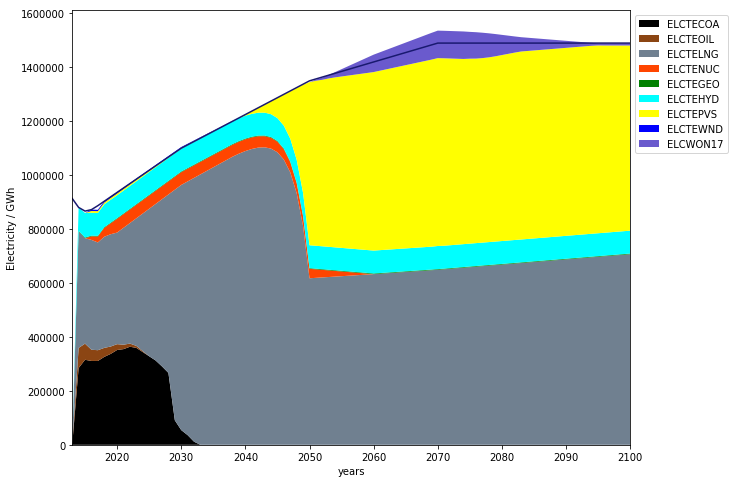

In [74]:
ordlegend=['ELCTECOA','ELCTEOIL', 'ELCTELNG', 'ELCTENUC', 'ELCTEGEO', 'ELCTEHYD', 'ELCTEPVS', 'ELCTEWND', 'ELCWON17']
colours = ['black', 'saddlebrown', 'slategray', 'orangered', 'green', 'aqua','yellow', 'blue', 'slateblue','midnightblue']
f, ax = plt.subplots(figsize=(10, 8))
ax.stackplot(years, pltdict['ELCTECOA']+pltdict['ELCCOA17'], pltdict['ELCTEOIL'], pltdict['ELCTELNG']+pltdict['ELCCC17'], 
             pltdict['ELCTENUC'],pltdict['ELCTEGEO'], pltdict['ELCTEHYD'], pltdict['ELCTEPVS']+pltdict['ELCPVN17'], 
              pltdict['ELCTEWND'],pltdict['ELCWON17'], labels=ordlegend, colors=colours)
dmd=[913791,880396,866861,872251,8.87E+05,1.10E+06,1.35E+06,1.49E+06,1.49E+06]
yr=[2013,2014,2015,2016,2017,2030,2050,2070,2100]
ax.plot(yr,dmd)
ax.set_xlim((2013, 2100))
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_xlabel('years')
ax.set_ylabel('Electricity / GWh')
f.savefig('flex_hyd.jpg',  bbox_inches='tight', dpi=300)
